# Tahap Analisis
## 1. Item paling banyak dibeli
## 2. Urutan Total Spent sesuai Item
## 3. Metode payment yang sering digunakan
## 4. Pelanggan lebih suka takeaway apa makan ditempat
## 5. Tren Total Pendapatan Bulanan

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('clean_cafe_sales.csv')
df

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11
...,...,...,...,...,...,...,...,...
8608,TXN_4766549,Smoothie,2.0,4.0,NaN,Cash,Unknown,2023-10-20
8609,TXN_7672686,Coffee,2.0,2.0,4.0,Unknown,Unknown,2023-08-30
8610,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02
8611,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,Unknown,2023-12-02


### 1. Item paling banyak dibeli

In [106]:
largest_quantity = df.groupby(['Item'])['Quantity'].sum().reset_index()
largest_quantity

,Item,Quantity
0,Cake,3143.0
1,Coffee,3251.0
2,Cookie,2946.0
3,Juice,3216.0
4,Salad,3161.0
5,Sandwich,3089.0
6,Smoothie,3085.0
7,Tea,2975.0


Text(0.5, 1.0, 'Item Quantity')

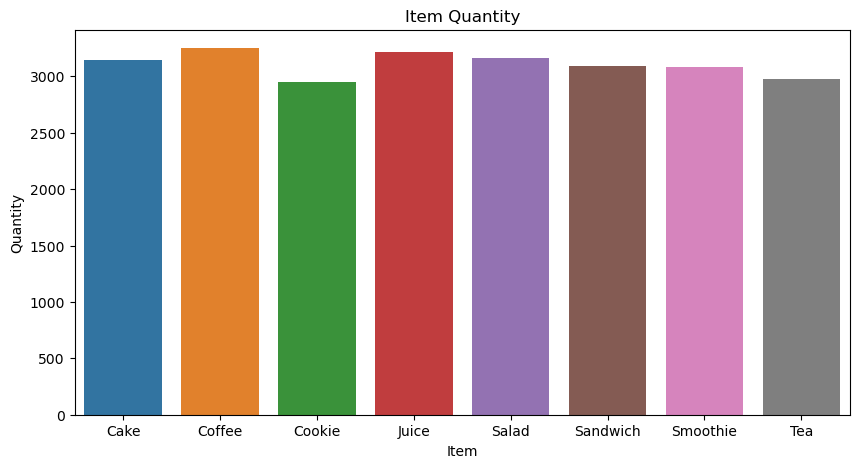

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(x=largest_quantity['Item'], y=largest_quantity['Quantity'], hue=largest_quantity['Item'])
plt.title('Item Quantity')

### 2. Urutan Total Spent sesuai Item

In [108]:
largest_spent = df.groupby(['Item'])['Total Spent'].sum().reset_index()
largest_spent

,Item,Total Spent
0,Cake,9393.0
1,Coffee,6530.0
2,Cookie,2922.0
3,Juice,9540.0
4,Salad,15855.0
5,Sandwich,12328.0
6,Smoothie,12040.0
7,Tea,4453.5


Text(0.5, 1.0, 'Total Spent on Item')

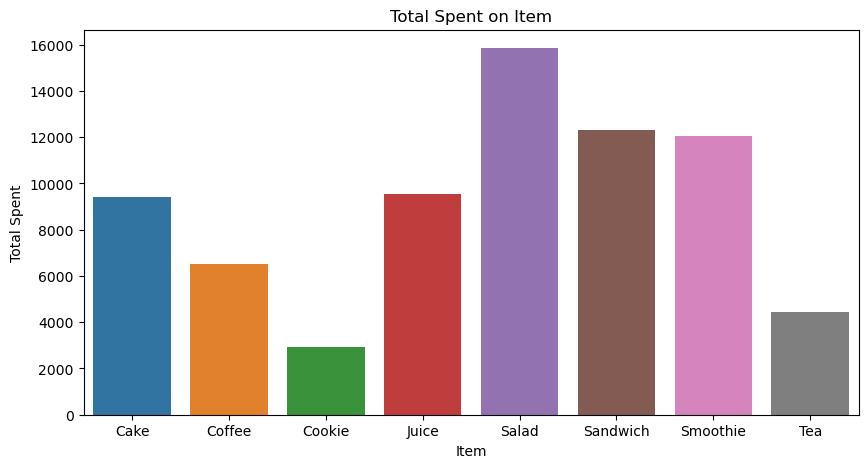

In [109]:
plt.figure(figsize=(10,5))
sns.barplot(x=largest_spent['Item'], y=largest_spent['Total Spent'], hue=largest_spent['Item'])
plt.title('Total Spent on Item')

### Multiple Plots (1 & 2)

Text(0.5, 1.0, 'Total Spent on Item')

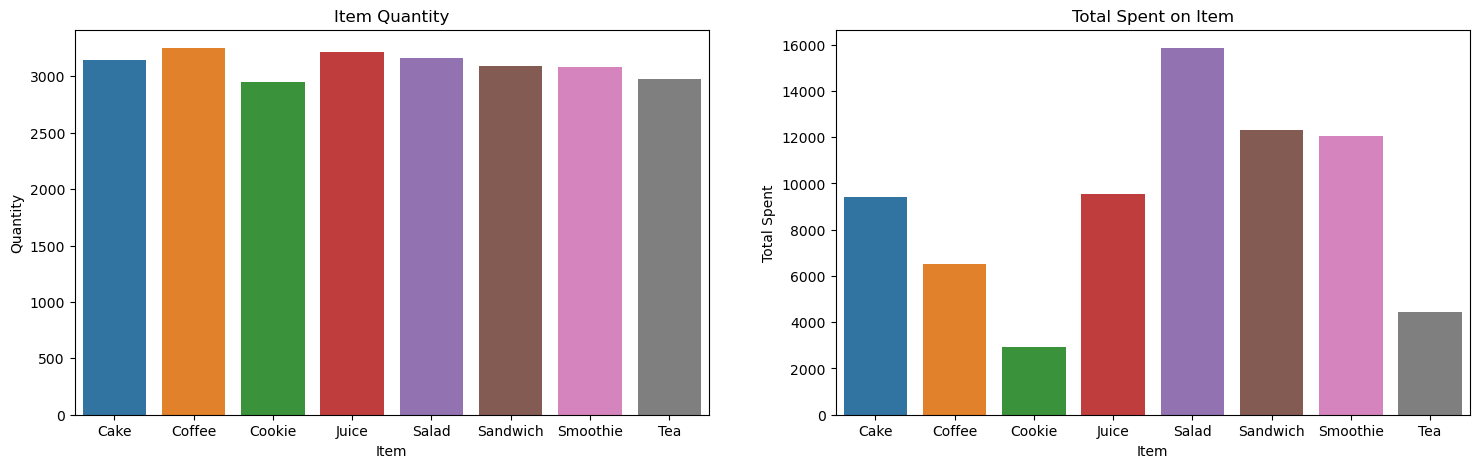

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.barplot(x=largest_quantity['Item'], y=largest_quantity['Quantity'], hue=largest_quantity['Item'], ax=axes[0])
axes[0].set_title('Item Quantity')

sns.barplot(x=largest_spent['Item'], y=largest_spent['Total Spent'], hue=largest_spent['Item'], ax=axes[1])
axes[1].set_title('Total Spent on Item')

### 3. Metode payment yang sering digunakan

In [111]:
df_copy = df.copy()
df_copy['Payment Method'] = df_copy['Payment Method'].str.replace('Error', 'Unknown')
method_data = df_copy.groupby(['Payment Method'])['Transaction ID'].count().reset_index().rename(columns={'Transaction ID':'Total'})
method_data

,Payment Method,Total
0,Cash,1956
1,Credit Card,1949
2,Digital Wallet,1980
3,Unknown,2728


Text(0.5, 1.0, 'Method Payment')

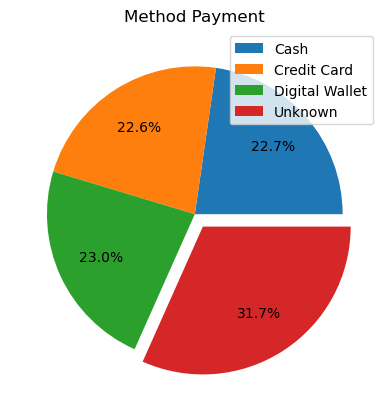

In [112]:
explode = [0,0,0,0.1]
plt.pie(method_data['Total'], labels=None, explode=explode,
        autopct='%.1f%%', pctdistance=0.7)
plt.legend(labels=method_data['Payment Method'])
plt.title('Method Payment')

### 4. Pelanggan lebih suka takeaway apa makan ditempat

In [113]:
df_copy['Location'] = df_copy['Location'].str.replace('Error', 'Unknown')
location_summary = df_copy.groupby(['Location'])['Transaction ID'].count().reset_index().rename(columns={'Transaction ID':'Total'})
location_summary

,Location,Total
0,In-store,2587
1,Takeaway,2603
2,Unknown,3423


Text(0.5, 1.0, 'Customers Location')

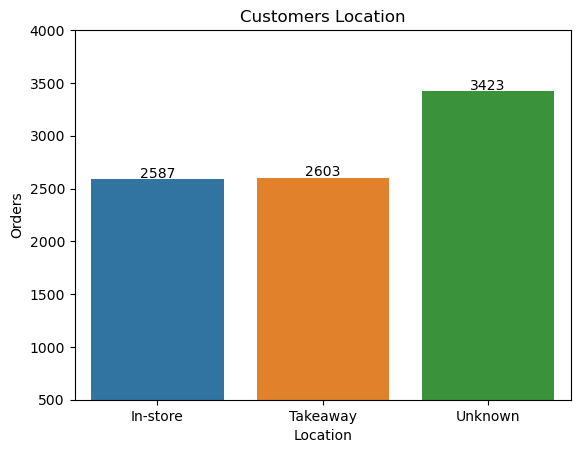

In [114]:
barplot = sns.barplot(x=location_summary['Location'], y=location_summary['Total'], hue=location_summary['Location'])
for container in barplot.containers:
    barplot.bar_label(container, fmt='%.0f', padding=-1)
plt.ylim(500,4000)
plt.ylabel('Orders')
plt.title('Customers Location')

### 5. Tren Total Pendapatan Bulanan

In [115]:
df_copy['Transaction Date'] = pd.to_datetime(df_copy['Transaction Date'])
df_copy['month'] = df_copy['Transaction Date'].dt.month
df_copy

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,month
0,TXN_1961373,Coffee,2.0,2.0,4.0,Credit Card,Takeaway,2023-09-08,9
1,TXN_4977031,Cake,4.0,3.0,12.0,Cash,In-store,2023-05-16,5
2,TXN_4271903,Cookie,4.0,1.0,NaN,Credit Card,In-store,2023-07-19,7
3,TXN_7034554,Salad,2.0,5.0,10.0,Unknown,Unknown,2023-04-27,4
4,TXN_3160411,Coffee,2.0,2.0,4.0,Digital Wallet,In-store,2023-06-11,6
...,...,...,...,...,...,...,...,...,...
8608,TXN_4766549,Smoothie,2.0,4.0,NaN,Cash,Unknown,2023-10-20,10
8609,TXN_7672686,Coffee,2.0,2.0,4.0,Unknown,Unknown,2023-08-30,8
8610,TXN_5255387,Coffee,4.0,2.0,8.0,Digital Wallet,Unknown,2023-03-02,3
8611,TXN_7695629,Cookie,3.0,NaN,3.0,Digital Wallet,Unknown,2023-12-02,12


In [116]:
monthly_tren = df_copy.groupby(['month'])['Total Spent'].sum().reset_index()
monthly_tren

,month,Total Spent
0,1,6307.5
1,2,5653.5
2,3,6171.0
3,4,6039.0
4,5,5974.5
5,6,6349.5
6,7,5889.5
7,8,6154.5
8,9,5880.5
9,10,6494.5


Text(0, 0.5, 'Income (USD)')

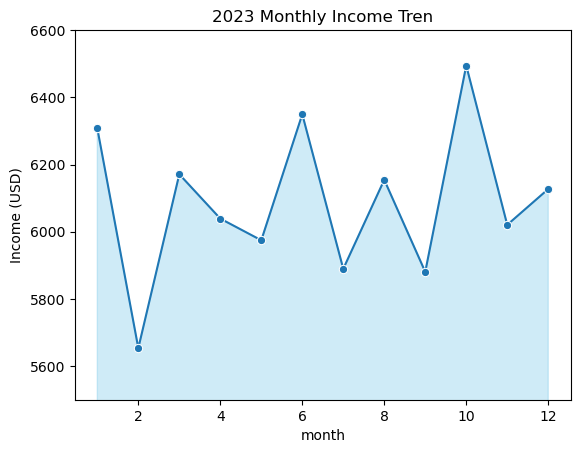

In [117]:
sns.lineplot(data=monthly_tren, x='month', y='Total Spent', marker='o', markersize=6)
plt.fill_between(monthly_tren['month'], monthly_tren['Total Spent'], color='skyblue', alpha=0.4)
plt.ylim(5500, 6600)
plt.title('2023 Monthly Income Tren')
plt.ylabel('Income (USD)')